In [21]:
import pandas as pd
import numpy as np
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import style


data = pd.read_csv('/home/marwa/Titanic_bdd/bdd/train.csv')
data.shape
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  2. Nettoyer la data avec drop(), dropna() et fillna()

In [22]:
#data = data.drop(['Name','PassengerId','Sibp','Ticket', 'Cabin', 'Fare', 'Sibsp', 'Embarked', 'Parch','home.dest'], axis=1, errors='ignore')
data = data.dropna(axis=0)
data.shape

(183, 12)

<Axes: >

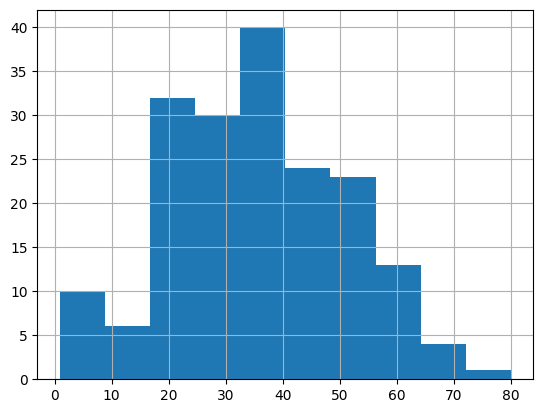

In [23]:
data['Age'].hist()

# Identifier et supprimer les doublons

In [24]:
# Vérifier le nombre de doublons
print("Nombre de doublons dans le dataset :")
print(data.duplicated().sum())

# Afficher les lignes dupliquées
print("\nLignes dupliquées :")
print(data[data.duplicated()])

# Supprimer les doublons et garder la première occurrence
data_clean = data.drop_duplicates()

# Vérifier la taille du dataset avant et après
print("\nTaille du dataset :")
print(f"Avant : {data.shape[0]} lignes")
print(f"Après : {data_clean.shape[0]} lignes")

# Nombre de lignes supprimées
print(f"\nNombre de lignes supprimées : {data.shape[0] - data_clean.shape[0]}")

# Réassigner le dataset nettoyé
data = data_clean

Nombre de doublons dans le dataset :
0

Lignes dupliquées :
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Taille du dataset :
Avant : 183 lignes
Après : 183 lignes

Nombre de lignes supprimées : 0


# ANALYSE

In [25]:
#data = data.drop(['Name','PassengerId','Sibp','Ticket', 'Cabin', 'Fare', 'Sibsp', 'Embarked', 'Parch','home.dest'], axis=1, errors='ignore')
print(data.head())
data.head()
print(data.columns)
data.describe()


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  
Index(['PassengerId', 'Survived'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


# Données manquantes

In [26]:
data = pd.read_csv('/home/marwa/Titanic_bdd/bdd/train.csv')
data.head()
data.describe()
#  on constaste qu'il manque des données 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


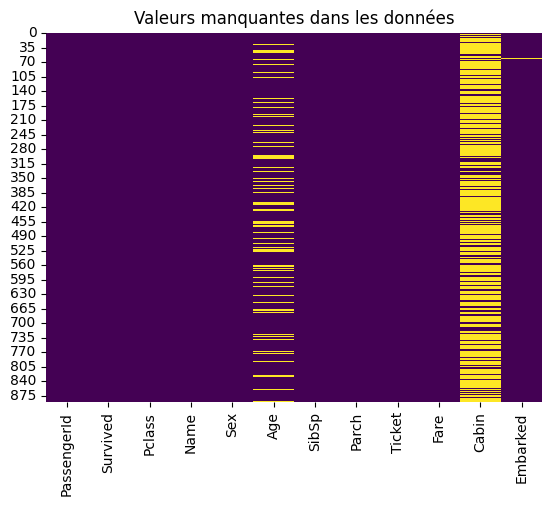

valeurs manquantes d'Age avant remplacement
177


In [58]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Valeurs manquantes dans les données")
plt.show()

print("valeurs manquantes d'Age avant remplacement")
print(data['Age'].isnull().sum())

In [59]:
data = data.assign(Age=data['Age'].fillna(data['Age'].median()))


data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].median())

print("Valeurs manquantes Age après remplacement:", data['Age'].isnull().sum())

Valeurs manquantes Age après remplacement: 0


#            valeurs manquantes par colonne

In [ ]:
print("Les valeurs manquantes par colonne sont")
missing_values = data.isnull().sum()
print(missing_values)

Les valeurs manquantes par colonne sont
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Vérification des statistiques de la colonne Age


In [ ]:
print("\nStatistiques de la colonne Age:")
print(data['Age'].describe())


Statistiques de la colonne Age:
count    202.000000
mean      34.952574
std       15.054584
min        0.920000
25%       25.000000
50%       33.500000
75%       46.750000
max       80.000000
Name: Age, dtype: float64


In [ ]:
#data.drop('Cabin', axis=1, inplace=True)
#print("valeurs manquantes de Embarked avant remplacement")
#print(data['Embarked'].isnull().sum())

#    REMPLACER LES VALEURS MANQUANTES


In [68]:
#data = data.drop(['Name', 'PassengerId','SibSp','Ticket', 'Cabin', 'Fare', 'Sibsp', 'Parch','home.dest'], axis=1, errors='ignore')
data = data.dropna(axis=0)  # Supprimer les lignes avec des valeurs manquantes
data.shape  # Afficher la forme du DataFrame après suppression des lignes avec des valeurs manquantes
print(data.head())  # Afficher les premières lignes du DataFrame
data.describe()  # Afficher les statistiques descriptives du DataFrame

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Embarked  
1       0  PC 17599  71.2833        C  
3       0    113803  53.1000        S  
6       0     17463  51.8625        S  
10      1   PP 9549  16.7000        S  
11      0    113783  26.5500        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,34.952574,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,15.054584,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


#   Répartition des survivants et des morts

In [69]:
import pandas as pd
import plotly.express as px



#Compter le nombre de survivants et de morts
Survi = df['Survived'].value_counts().reset_index()
Survi.columns = ['Survived', 'Count']

Survi['Survived'] = Survi['Survived'].map({0: 'Morts', 1: 'Survivants'})

#Créer le graphique en barres
fig = px.bar(Survi, x='Survived', y='Count', title='Répartition des survivants et des morts')
fig.show()

#  Histogramme pour la distribution de l'âge

In [38]:
import plotly.express as px

# Créer l'histogramme avec Plotly
fig = px.histogram(
    data,
    x='Age',
    nbins=30,
    title="Distribution de l'âge des passagers",
    labels={'Age': 'Âge', 'count': 'Nombre de passagers'},
    marginal='box'  # Ajoute un boxplot en marge
)

# Personnaliser le graphique
fig.update_layout(
    title_x=0.5,
    bargap=0.1,
    xaxis_title="Âge",
    yaxis_title="Nombre de passagers",
    showlegend=False,
    plot_bgcolor='white'
)
# Afficher le graphique
fig.show()

# Afficher les statistiques descriptives
print("\nStatistiques descriptives de l'âge:")
print(data['Age'].describe().round(2))


Statistiques descriptives de l'âge:
count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64


#  taux de survie par tranche d'âge

In [28]:
import plotly.express as px
import numpy as np

# Définir les tranches d'âge
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data["AgeGroup"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Calculer le taux de survie par tranche d'âge
survival_by_age_group = data.groupby("AgeGroup")["Survived"].mean() * 100

# Créer le graphique à barres avec Plotly
fig = px.bar(x=survival_by_age_group.index, 
             y=survival_by_age_group.values,
             title='Taux de survie par tranche d\'âge',
             labels={'x': 'Tranche d\'âge', 
                    'y': 'Taux de survie (%)'},
             text=np.round(survival_by_age_group.values, 1))  # Using np.round instead of round

# Personnaliser le graphique
fig.update_layout(
    title_x=0.5,
    showlegend=False,
    xaxis_title="Tranche d'âge",
    yaxis_title="Taux de survie (%)",
    bargap=0.2
)

fig.show()

# Afficher les statistiques détaillées
print("\nTaux de survie par tranche d'âge :")
print(survival_by_age_group.round(2))

/tmp/ipykernel_1002/2133152000.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Taux de survie par tranche d'âge :
AgeGroup
0-10     80.00
11-20    78.95
21-30    75.00
31-40    75.51
41-50    51.52
51-60    63.64
61-70    12.50
71-80    50.00
Name: Survived, dtype: float64


# Distribution age moyen des femmes par classe

In [29]:
import plotly.express as px

# Filtrer pour ne garder que les femmes
femmes = data[data['Sex'] == 'female']

# Calculer l'âge moyen par classe
age_moyen_classe = femmes.groupby('Pclass')['Age'].mean().reset_index()

# Créer un graphique à barres avec Plotly
fig = px.bar(age_moyen_classe, 
             x='Pclass', 
             y='Age',
             title='Âge moyen des femmes par classe',
             labels={'Pclass': 'Classe', 
                    'Age': 'Âge moyen'},
             color='Pclass')

# Personnaliser le graphique
fig.update_layout(
    title_x=0.5,
    showlegend=False,
)

# Ajouter les valeurs sur les barres
fig.update_traces(texttemplate='%{y:.1f} ans', textposition='outside')

# Afficher le graphique
fig.show()

# Afficher les statistiques détaillées
print("\nÂge moyen des femmes par classe:")
print(age_moyen_classe.round(2))


Âge moyen des femmes par classe:
   Pclass    Age
0       1  34.09
1       2  29.61
2       3  17.20


#   Répartition des survivantes par âge et classe

In [30]:
import plotly.express as px

# Filtrer pour ne garder que les femmes
femmes = data[data['Sex'] == 'female']

# Créer le graphique avec Plotly
fig = px.scatter(femmes, 
                x='Age', 
                y='Pclass',
                color='Survived',
                title='Répartition des survivantes par âge et classe',
                labels={'Age': 'Âge', 
                       'Pclass': 'Classe',
                       'Survived': 'Survivante'},
                color_discrete_map={0: 'red', 1: 'green'})

# Inverser l'axe y pour avoir la 1ère classe en haut
fig.update_yaxes(autorange="reversed")

# Ajouter des hover data
fig.update_traces(hovertemplate='Âge: %{x}<br>Classe: %{y}<br>Survivante: %{color}')

fig.show()

# Afficher les statistiques
print("\nStatistiques de survie des femmes par classe:")
print(femmes.groupby(['Pclass', 'Survived'])['Age'].describe())


Statistiques de survie des femmes par classe:
                 count       mean        std   min    25%   50%     75%   max
Pclass Survived                                                              
1      0           3.0  25.666667  24.006943   2.0  13.50  25.0  37.500  50.0
       1          71.0  34.450704  13.412988  14.0  22.50  35.0  44.000  63.0
2      0           1.0  57.000000        NaN  57.0  57.00  57.0  57.000  57.0
       1           8.0  26.187500  10.092209   4.0  23.75  28.0  32.875  36.0
3      0           2.0  15.500000  19.091883   2.0   8.75  15.5  22.250  29.0
       1           3.0  18.333333  12.503333   4.0  14.00  24.0  25.500  27.0


#       Age mmoyenne des personnes décedees

In [31]:
import pandas as pd
data = pd.read_csv("bdd/train.csv")

# Filtrer les passagers décédés
deceased = data[data["Survived"] == 0]

# Calculer la moyenne d'âge (en ignorant les NaN)
mean_age_deceased = deceased["Age"].mean()

print(f"Moyenne d'âge des personnes décédées : {mean_age_deceased:.2f} ans")

Moyenne d'âge des personnes décédées : 30.63 ans


#   NOMBRE DE PASSAGERS PAR CLASSE

In [46]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('bdd/train.csv')

#Calculer le nombre de personnes par classe
pclass_counts = df['Pclass'].value_counts().reset_index()
pclass_counts.columns = ['Pclass', 'Count']

#Créer le graphique en barres
fig = px.bar(pclass_counts, x='Pclass', y='Count', title='Nombre de personnes par classe')
fig.update_layout(xaxis_title='Classe', yaxis_title='Nombre de passagers')
fig.show()

#

<Axes: >

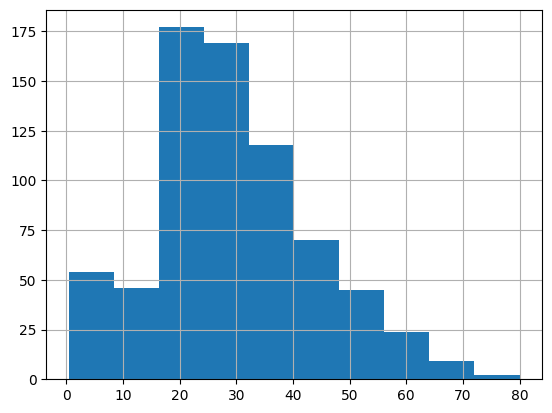

In [33]:
data["Age"].hist()

In [57]:
data[data['Age'] < 18]['Pclass'].value_counts()






Pclass
3    78
2    23
1    12
Name: count, dtype: int64

#       Répartition des passagers par sexe

In [ ]:
import plotly.express as px

# Calculer la répartition par sexe
sex_counts = data['Sex'].value_counts()
sex_percentages = (sex_counts / len(data) * 100).round(2)

# Créer un graphique en camembert amélioré
fig = px.pie(
    values=sex_counts,
    names=sex_counts.index,
    title='Répartition des passagers par sexe',
    labels={'index': 'Sexe', 'value': 'Nombre de passagers'},
    color_discrete_map={
        'male': '#3366cc',    # Bleu pour les hommes
        'female': '#dc3912'   # Rouge pour les femmes
    },
    hole=0.4  
)

# Personnaliser le graphique
fig.update_layout(
    title={
        'text': 'Répartition des passagers par sexe',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    showlegend=True,
    legend_title_text='Sexe',
    annotations=[
        dict(
            text=f'Total: {len(data)}',
            x=0.5,
            y=0.5,
            font_size=20,
            showarrow=False
        )
    ]
)

# Améliorer l'affichage des informations sur les segments
fig.update_traces(
    textposition='inside',
    textinfo='percent+value+label',
    hovertemplate="<b>%{label}</b><br>" +
                  "Nombre: %{value}<br>" +
                  "Pourcentage: %{percent}<br>" +
                  "<extra></extra>"
)

# Afficher le graphique
fig.show()

# Afficher les statistiques détaillées
print("\nRépartition détaillée par sexe:")
print("-" * 50)
print(f"{'Sexe':<10} {'Nombre':<10} {'Pourcentage':<10}")
print("-" * 50)
for sex, count in sex_counts.items():
    percentage = sex_percentages[sex]
    print(f"{sex:<10} {count:<10} {percentage:>6.1f}%")
print("-" * 50)


Répartition détaillée par sexe:
--------------------------------------------------
Sexe       Nombre     Pourcentage
--------------------------------------------------
male       577          64.8%
female     314          35.2%
--------------------------------------------------


#   Survivant par sexe 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


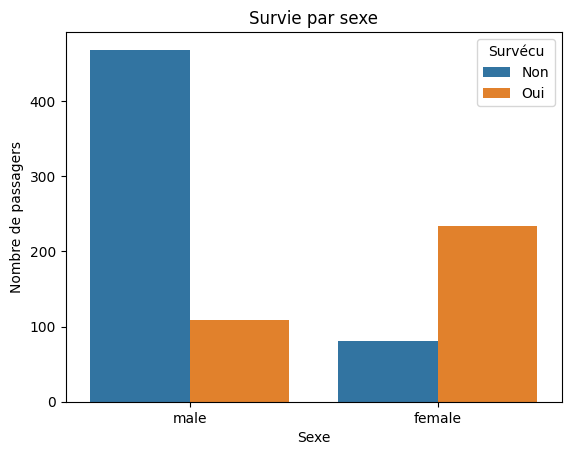

In [ ]:
import pandas as pd

data = pd.read_csv('/home/marwa/Titanic_bdd/train.csv')
print(data.columns)  # Vérifie que 'Sex' et 'Survived' sont bien présents

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survie par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

#           Répartition du prix des billets selon la classe

In [ ]:
import plotly.express as px
import pandas as pd

# Recharger les données en gardant la colonne Fare
data = pd.read_csv('/home/marwa/Titanic_bdd/train.csv')

# Créer le box plot avec Plotly
fig = px.box(data, 
             x="Pclass", 
             y="Fare",
             title="Répartition du prix des billets selon la classe",
             labels={"Pclass": "Classe", 
                    "Fare": "Prix du billet (£)"},
             color="Pclass")

# Personnaliser le graphique
fig.update_layout(
    title_x=0.5,
    showlegend=False,
    boxmode='group',
    yaxis_title="Prix du billet ()",
    xaxis_title="Classe"
)

# Afficher le graphique
fig.show()

# Afficher les statistiques détaillées
print("\nStatistiques des prix par classe:")
print(data.groupby("Pclass")["Fare"].describe().round(2))


Statistiques des prix par classe:
        count   mean    std  min    25%    50%   75%     max
Pclass                                                      
1       216.0  84.15  78.38  0.0  30.92  60.29  93.5  512.33
2       184.0  20.66  13.42  0.0  13.00  14.25  26.0   73.50
3       491.0  13.68  11.78  0.0   7.75   8.05  15.5   69.55


#           Répartition des passagers par port d'embarquement

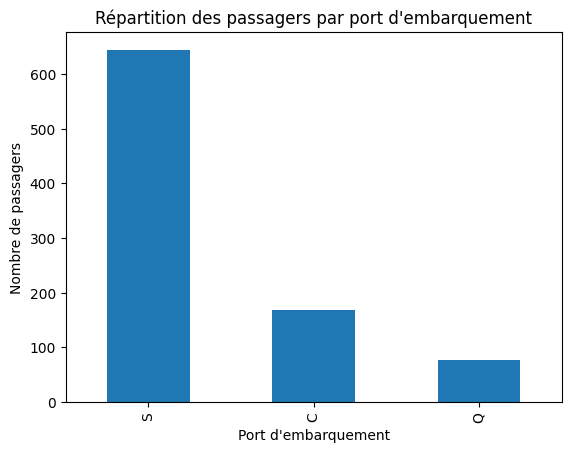

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/marwa/Titanic_bdd/train.csv')  # Recharge le fichier original

data['Embarked'].value_counts().plot.bar(title='Répartition des passagers par port d\'embarquement')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Nombre de passagers')
plt.show()

#           Nombre de survivants et de décès par port d'embarquement

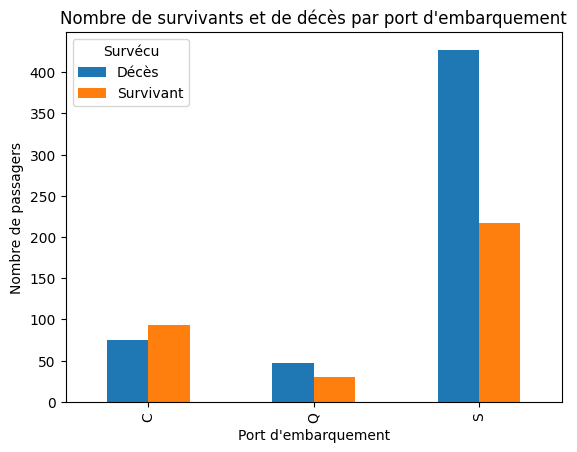

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/marwa/Titanic_bdd/train.csv')

# Tableau croisé du nombre de survivants et de décès par port d'embarquement
surv_counts = data.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Affichage sous forme de barres
surv_counts.plot(kind='bar', stacked=False)
plt.title("Nombre de survivants et de décès par port d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survécu", labels=["Décès", "Survivant"])
plt.show()

#           Nombre de passager en fonction des type de classe

In [ ]:
import plotly.express as px
import numpy as np

# Calculer la distribution des classes pour les passagers embarqués à Southampton (S)
southampton_classes = data[data['Embarked'] == 'S']['Pclass'].value_counts().reset_index() 
southampton_classes.columns = ['Classe', 'Nombre de passagers']

# Calculer les pourcentages
total_passengers = southampton_classes['Nombre de passagers'].sum()
southampton_classes['Pourcentage'] = (southampton_classes['Nombre de passagers'] / total_passengers * 100).round(1)

# Créer le graphique à barres avec Plotly
fig = px.bar(southampton_classes,
             x='Classe',
             y='Nombre de passagers',
             title='Distribution des classes pour les passagers embarqués à Southampton',
             text=southampton_classes.apply(lambda x: f"{x['Nombre de passagers']}<br>({x['Pourcentage']}%)", axis=1),
             color='Classe',
             color_continuous_scale='Blues')

# Personnaliser le graphique
fig.update_layout(
    title_x=0.5,
    xaxis_title="Classe",
    yaxis_title="Nombre de passagers",
    bargap=0.2,
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Améliorer l'apparence des barres
fig.update_traces(
    textposition='outside',
    textfont=dict(size=12),
    hovertemplate="Classe %{x}<br>Passagers: %{y}<br>%{text}<extra></extra>"
)

# Afficher le graphique
fig.show()

# Afficher les statistiques détaillées
print("\nDistribution détaillée des classes à Southampton :")
print(southampton_classes.to_string(index=False))





Distribution détaillée des classes à Southampton :
 Classe  Nombre de passagers  Pourcentage
      3                  353         54.8
      2                  164         25.5
      1                  127         19.7


#   #   Répartition des passagers par port d'embarquement

In [ ]:
print(data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


#           Taux de survie par classe

In [ ]:
import plotly.express as px

# Calculer le taux de survie par classe
survival_by_class = data.groupby('Pclass')['Survived'].mean() * 100

# Créer le graphique à barres avec Plotly
fig = px.bar(
    x=survival_by_class.index,
    y=survival_by_class.values,
    title='Taux de survie selon la classe',
    labels={'x': 'Classe', 'y': 'Taux de survie (%)'},
    text=np.round(survival_by_class.values, 1)
)

# Personnaliser le graphique
fig.update_layout(
    title_x=0.5,
    showlegend=False,
    xaxis_title="Classe",
    yaxis_title="Taux de survie (%)",
    bargap=0.2
)

# Ajouter les pourcentages sur les barres
fig.update_traces(
    texttemplate='%{text}%',
    textposition='outside',
    marker_color='rgb(55, 83, 109)'
)

# Afficher le graphique
fig.show()

# Afficher les statistiques détaillées
print("\nTaux de survie par classe :")
print(survival_by_class.round(2))


Taux de survie par classe :
Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


#       Visualisation de la répartition des survivants et non-survivants

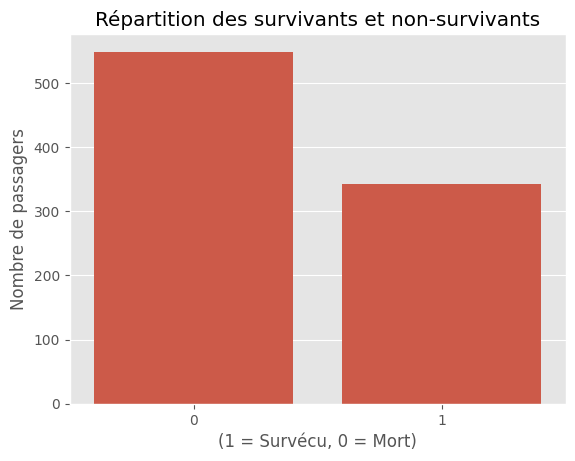

In [ ]:
sns.countplot(data=data, x='Survived')
plt.title("Répartition des survivants et non-survivants")
plt.xlabel("(1 = Survécu, 0 = Mort)")
plt.ylabel("Nombre de passagers")
plt.show()

#            valeurs manquantes par colonne



In [ ]:
print("Les valeurs manquantes par colonne sont")
missing_values = data.isnull().sum()
print(missing_values)

Les valeurs manquantes par colonne sont
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Visualiser les valeurs manquantes

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

print("valeurs manquantes de Embarked avant remplacement")
print(data['Embarked'].isnull().sum())

valeurs manquantes de Embarked avant remplacement
2
